In [1]:
import numpy as np # 导入Numpy
import pandas as pd # 导入Pandas
from sklearn import datasets # 导入sklearn的数据集
iris = datasets.load_iris() # 导入iris
X_sepal = iris.data[:,[0,1]] # 花萼特征集：两个特征长和宽
X_petal = iris.data[:,[2,3]] # 花瓣特征集：两个特征长和宽
y = iris.target # 标签集

In [2]:
from sklearn.model_selection import train_test_split # 导入拆分数据集工具
from sklearn.preprocessing import StandardScaler # 导入标准化工具
X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = \
  train_test_split(X_sepal,y,test_size=0.3,random_state=0) # 拆分数据集
print("花萼训练集样本数: ", len(X_train_sepal))
print("花萼测试集样本数: ", len(X_test_sepal))
scaler = 	StandardScaler() # 标准化工具
X_train_sepal = scaler.fit_transform(X_train_sepal) # 训练集数据标准化
X_test_sepal = scaler.transform(X_test_sepal) # 测试集数据标准化
# 合并特征集和标签集，留待以后数据展示之用
X_combined_sepal = np.vstack((X_train_sepal,X_test_sepal)) # 合并特征集
Y_combined_sepal = np.hstack((y_train_sepal,y_test_sepal)) # 合并标签集

花瓣训练集样本数:  105
花瓣测试集样本数:  45


In [3]:
from sklearn.linear_model import LogisticRegression # 导入逻辑回归模型
lr = LogisticRegression(penalty='l2', C = 0.1) # 设定L2正则化和C参数
lr.fit(X_train_sepal,y_train_sepal) # 训练机器
score = lr.score(X_test_sepal,y_test_sepal) # 测试集分数评估
print("SK-learn逻辑回归测试准确率 {:.2f}%".format(score*100)) 

SK-learn逻辑回归测试准确率 66.67%


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [4]:
import matplotlib.pyplot as plt # 导入matplotlib
from matplotlib.colors import ListedColormap # 导入Colormap
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):    
    markers = ('o','x','v')
    colors = ('red','blue','lightgreen')
    color_Map = ListedColormap(colors[:len(np.unique(y))])     
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)    
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())   
    X_test, Y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = color_Map(idx),
                    marker = markers[idx], label = cl)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

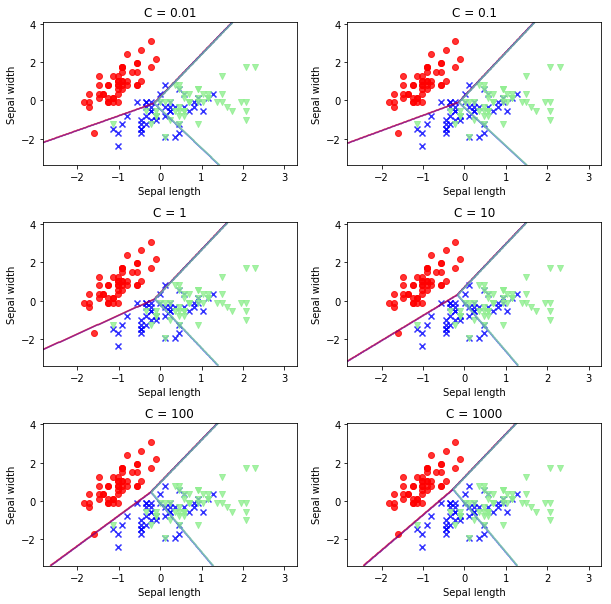

In [5]:
from sklearn.metrics import accuracy_score # 导入准确率指标
C_param_range = [0.01,0.1,1,10,100,1000]
sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
sepal_acc_table['C_parameter'] = C_param_range
plt.figure(figsize=(10, 10))
j = 0
for i in C_param_range:
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(X_train_sepal,y_train_sepal)
    y_pred_sepal = lr.predict(X_test_sepal)
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1    
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_sepal, y = Y_combined_sepal, 
                          classifier = lr, test_idx = range(0,150))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('C = %s'%i)

In [6]:
lr = LogisticRegression(penalty='l2', C = 10) # 设定L2正则化和C参数
lr.fit(X_train_sepal,y_train_sepal) # 训练机器
score = lr.score(X_test_sepal,y_test_sepal) # 测试集分数评估
print("Sklearn逻辑回归测试准确率 {:.2f}%".format(score*100))

Sklearn逻辑回归测试准确率 68.89%


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
